In [37]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

model_dir = 'saved_models/12_custom_models/'

So far we have used tf.keras mainly. That is usually enough for 95% of time, however if you need to dive deeper, you can use Tensorflow's lower level API.

# A quick tour of Tensorflow

Below are some characteristics of the TensorFlow API:

- Its core is very similar to Numpy, but with GPU support
- Supports distributed computing
- Its compiler allows for optimization of computing speed and memory usage. It works by extracting the *computation graph* from a Python function then optimizing it, and finally running it.
- Computation graphs are portable, meaning you can train models in one environment (e.g Python) and run it in another (e.g. Java or Android)
- Implements autodiff and provides excellent standard optimizers such as RMSPROP and Nadam

It also has features for loading and preprocessing data (tf.data, tf.io), image processing (tf.image), signal processing (tf.signal) and more.

TensorFlow is at the center of an extensive ecosystem of libraries. TensorBoard allows for vizualization, TensorFlow Extended (TFX) is a set of libraries built to productionize TensorFlow Projects, including tools for data validation, preprocessing, model analysis and serving. TensorFlow Hub provides a way to download and share pretrained neural networks. Finally you can check [TensorFlow Resources](https://www.tensorflow.org/resources) and this [github pages](https://github.com/jtoy/awesome-tensorflow) for more TensorFlow-based projects. 

# Using TensorFlow like Numpy

A tensor is usually a multidimensional array (just like numpy's ndarray), but it can also hold a scalar.

### Tensors and Operations

Use ```tf.constant()``` to create a tensor

In [1]:
import tensorflow as tf

In [2]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t.shape

TensorShape([2, 3])

In [5]:
t.dtype

tf.float32

Indexing is the same as Numpy

In [6]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [8]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [9]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

Use the @ to perform matrix multiplication

In [10]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [11]:

tf.linalg.matmul(t, tf.transpose(t))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

You will find all basic math operations and most numpy operations in TensorFlow. Some might have a different name (e.g. np.mean() = tf.reduce_mean()). When the name differs, there is a good reason for it. For example for tf.reduce_sum(), the GPU implementation does not guarantee the order in which elements are added, so for 32-bit floats the result may change ever so slightly.

### Tensors and NumPy

You can create a tensor from a numpu array and vice versa. You can even apply TF operations to a numpy array and numpy operations to tensors

In [12]:
import numpy as np

a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [13]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [14]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [15]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

Note that NumPy uses 64-bit precision by default while TensorFlow uses 32-bit. This is because 32-bit is generally more than enough for Neural Nets and it runs faster while using less RAM. When you create a tensor from a NumPy array, set ```dtype=float32```

### Type conversions

TensorFlow does not execute automatic type conversions. It raises an exception if you try to execute an operation on tensors with incompatible types. For example you cannot add a float tensor and an integer tensor, nor add a 32-bit float and a 64-bit float.

In [16]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]

You can use tf.cast if you really need to convert types

In [20]:
tf.constant(2.) + tf.cast(tf.constant(40), tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Variables

```tf.Tensor``` values we have seen so far are immutable. Thus we cannot use regular tensors to implement weights in a NN since they need to be tweaked by backpropagation. For this we can use ```tf.Variable```

In [21]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

Variables can be modified using the ```assign()``` method

In [22]:
v.assign(2 + v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[3., 4., 5.],
       [6., 7., 8.]], dtype=float32)>

In [23]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[3., 4., 5.],
       [6., 7., 8.]], dtype=float32)>

### Other Data Structures

Some of the other structures available are

*Sparse tensors* (tf.SparseTensor)

Efficiently represent tensors containing mostly zeros. tf.sparse contains operations for these tensors

*Tensor Arrays* (tf.TensorArray)

Lists of tensors. Have fixed size by default but can optionally be made dynamic. All tensors they contain must have the same shape and data type

*Ragged tensors* (tf.RaggedTensor)

Static lists of tensors, where every tensor has the same shape and data type. 

*String tensors*

Regular tensors of type tf.string. These are byte strings, not unicode strings. Creating a tensor using a Unicode string automatically converts them to UTF-8. 

*Sets*

Are represented as regular (or sparse) tensors. For example ```tf.constant([[1,2], [3,4]])``` represents the two sets {1,2} and {3,4}. 

*Queues*

Store tensors across multiple steps. TensorFlow offers various kinds of queues: FIFO, PriorityQueues, RandomShuffleQueue) and batch items of different shapes by padding (PaddingFIFOQueue)

## Customizing Models and Training Algorithms

### Custom loss functions

For the next example, let's suppose we want to create a regression model but the training set is noisy. If we use MSE as the loss functions, we will penalize large errors too much causing the model to be imprecise. Mean Absolute error fixes that but the model might take a while to converge and the trained model might not be very precise. 

We propose using the Huber loss (introduced in chapter 10). It is not implemented in Keras by default but it is in tf. keras, we can use ```keras.losses.Huber```. Let's pretend it is not implemeted and create our own Huber loss.

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [18]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error)/2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

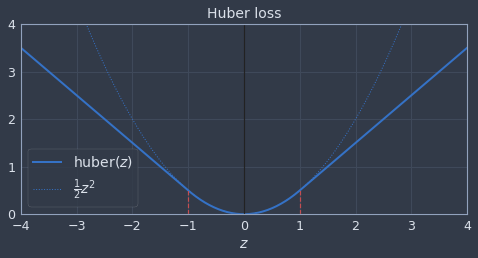

In [33]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

We can now use this loss when creating and compiling a model:

In [38]:
import keras
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

model.compile(loss=huber_fn, optimizer='nadam', metrics=['mae'])

model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
model.save(model_dir + 'my_model_with_custom_loss.h5')

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 54us/step - loss: 0.3994 - mae: 0.7267 - val_loss: 0.1913 - val_mae: 0.4744
Epoch 2/2
11610/11610 [==============================] - 1s 45us/step - loss: 0.1970 - mae: 0.4843 - val_loss: 0.1827 - val_mae: 0.4620


But what happens to the loss when we save and load up the model?

### Saving and Loading Models with Custom Components

When loading a model containing a custom object (such as a function), we need to map the names to the objects using a dictionary

In [41]:
model = keras.models.load_model(model_dir + 'my_model_with_custom_loss.h5', 
                               custom_objects={'huber_fn':huber_fn})

The above implementation of the huber function has the threshold $\delta$ automatically set to 1, what if we want to add a custome threshold? If we use the method above, saving the model does not change the threshold. We can solve this by creating a subclass of ther keras.losses.Loss class and implementing the ```get_config()``` method

In [48]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
        
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

We can then use an instance of this class when compiling

In [62]:
# model.compile(loss=HuberLoss(threshold=2.), optimizer='nadam', metrics=['mae'])

# model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))
# model.save(model_dir + 'my_model_with_custom_loss_class.h5')

Then when loading the class we follow the same procedure. Note: because the code above is throwing and odd error, this is not functional at the moment

In [60]:
# model = keras.models.load_model(model_dir + 'my_model_with_custom_loss_class.h5', 
#                                custom_objects={'HuberLoss':HuberLoss})